In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

columns = ['idx', 'Lx', 'Ly', 'Lw', 'Lh', 'Rx', 'Ry', 'Rw', 'Rh']
listed = [[1, 629, 97, 955, 352, 692, 97, 955, 352],
         [2, 149, 87, 458, 312, 77, 117, 384, 343],
         [3, 146, 83, 463, 312, 72, 109, 384, 339],
         [4, 538, 82, 845, 320, 457, 111, 760, 345],
            [5, 188, 62, 576, 351, 102, 96, 478, 375],
            [6, 182, 47, 647, 381, 55, 74, 526, 407],
            [7, 143, 19, 685, 422, 7, 46, 541, 448]]
df = pd.DataFrame(listed, columns=columns)
df

,idx,Lx,Ly,Lw,Lh,Rx,Ry,Rw,Rh
0,1,629,97,955,352,692,97,955,352
1,2,149,87,458,312,77,117,384,343
2,3,146,83,463,312,72,109,384,339
3,4,538,82,845,320,457,111,760,345
4,5,188,62,576,351,102,96,478,375
5,6,182,47,647,381,55,74,526,407
6,7,143,19,685,422,7,46,541,448


In [21]:
def cm_disparity(x, y):
    disp = abs(x-y)
    return disp

def dist_formula(disparity):
    T = 2.6 # cm
    f = 0.315 # cm
    img_element = 0.0001*2.8 # cm
    K = int(T*f/img_element) # 2925
    dist = K/disparity
    return dist 
 
df["disparity"] = df.apply(lambda x : cm_disparity(x["Lx"], x["Rx"]), axis=1)
df['distance(z)'] = df['disparity'].apply(dist_formula)
df

,idx,Lx,Ly,Lw,Lh,Rx,Ry,Rw,Rh,disparity,distance(z)
0,1,629,97,955,352,692,97,955,352,63,46.428571
1,2,149,87,458,312,77,117,384,343,72,40.625000
2,3,146,83,463,312,72,109,384,339,74,39.527027
3,4,538,82,845,320,457,111,760,345,81,36.111111
4,5,188,62,576,351,102,96,478,375,86,34.011628
5,6,182,47,647,381,55,74,526,407,127,23.031496
6,7,143,19,685,422,7,46,541,448,136,21.507353


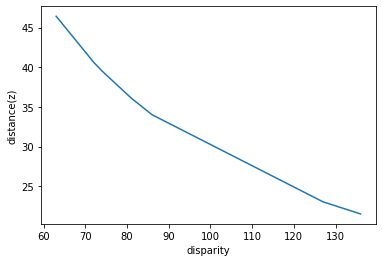

In [22]:
fig, ax = plt.subplots()
x = np.array(df['disparity'])
y = np.array(df['distance(z)'])

# プロット
ax.plot(x, y, label="test")
ax.set_xlabel('disparity')
ax.set_ylabel('distance(z)')
# プロット表示(設定の反映)
plt.show()